# Importing Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Reading Files

In [3]:
matches = pd.read_csv('matches.csv')
deliveries = pd.read_csv('deliveries.csv')

In [4]:
matches.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [5]:
deliveries.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN


In [6]:
matches.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               756 non-null    int64 
 1   season           756 non-null    int64 
 2   city             749 non-null    object
 3   date             756 non-null    object
 4   team1            756 non-null    object
 5   team2            756 non-null    object
 6   toss_winner      756 non-null    object
 7   toss_decision    756 non-null    object
 8   result           756 non-null    object
 9   dl_applied       756 non-null    int64 
 10  winner           752 non-null    object
 11  win_by_runs      756 non-null    int64 
 12  win_by_wickets   756 non-null    int64 
 13  player_of_match  752 non-null    object
 14  venue            756 non-null    object
 15  umpire1          754 non-null    object
 16  umpire2          754 non-null    object
 17  umpire3          119 non-null    ob

In [8]:
deliveries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179078 entries, 0 to 179077
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   match_id          179078 non-null  int64 
 1   inning            179078 non-null  int64 
 2   batting_team      179078 non-null  object
 3   bowling_team      179078 non-null  object
 4   over              179078 non-null  int64 
 5   ball              179078 non-null  int64 
 6   batsman           179078 non-null  object
 7   non_striker       179078 non-null  object
 8   bowler            179078 non-null  object
 9   is_super_over     179078 non-null  int64 
 10  wide_runs         179078 non-null  int64 
 11  bye_runs          179078 non-null  int64 
 12  legbye_runs       179078 non-null  int64 
 13  noball_runs       179078 non-null  int64 
 14  penalty_runs      179078 non-null  int64 
 15  batsman_runs      179078 non-null  int64 
 16  extra_runs        179078 non-null  int

In [9]:
matches['umpire3'].isnull().sum()

637

In [10]:
matches = matches.drop(columns=['umpire3'],axis=1)
matches.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN


In [11]:
matches.describe()

,id,season,dl_applied,win_by_runs,win_by_wickets
count,756.000000,756.000000,756.000000,756.000000,756.000000
mean,1792.178571,2013.444444,0.025132,13.283069,3.350529
std,3464.478148,3.366895,0.156630,23.471144,3.387963
min,1.000000,2008.000000,0.000000,0.000000,0.000000
25%,189.750000,2011.000000,0.000000,0.000000,0.000000
50%,378.500000,2013.000000,0.000000,0.000000,4.000000
75%,567.250000,2016.000000,0.000000,19.000000,6.000000
max,11415.000000,2019.000000,1.000000,146.000000,10.000000


In [12]:
matches['season'].uniqueue()

array([2017, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2018,
       2019], dtype=int64)

In [16]:
# max Win by Run Team
matches.iloc[matches['win_by_runs'].idxmax()]['winner']

'Mumbai Indians'

In [17]:
# max Win by Wicket Team
matches.iloc[matches['win_by_wickets'].idxmax()]['winner']

'Kolkata Knight Riders'

In [19]:
# Count Of Wins Per Season
count_of_wins_per_season = matches.groupby("season")["winner"].value_counts()
count_of_wins_per_season

season  winner                     
2008    Rajasthan Royals               13
        Kings XI Punjab                10
        Chennai Super Kings             9
        Delhi Daredevils                7
        Mumbai Indians                  7
                                       ..
2019    Kings XI Punjab                 6
        Kolkata Knight Riders           6
        Sunrisers Hyderabad             6
        Rajasthan Royals                5
        Royal Challengers Bangalore     5
Name: winner, Length: 100, dtype: int64

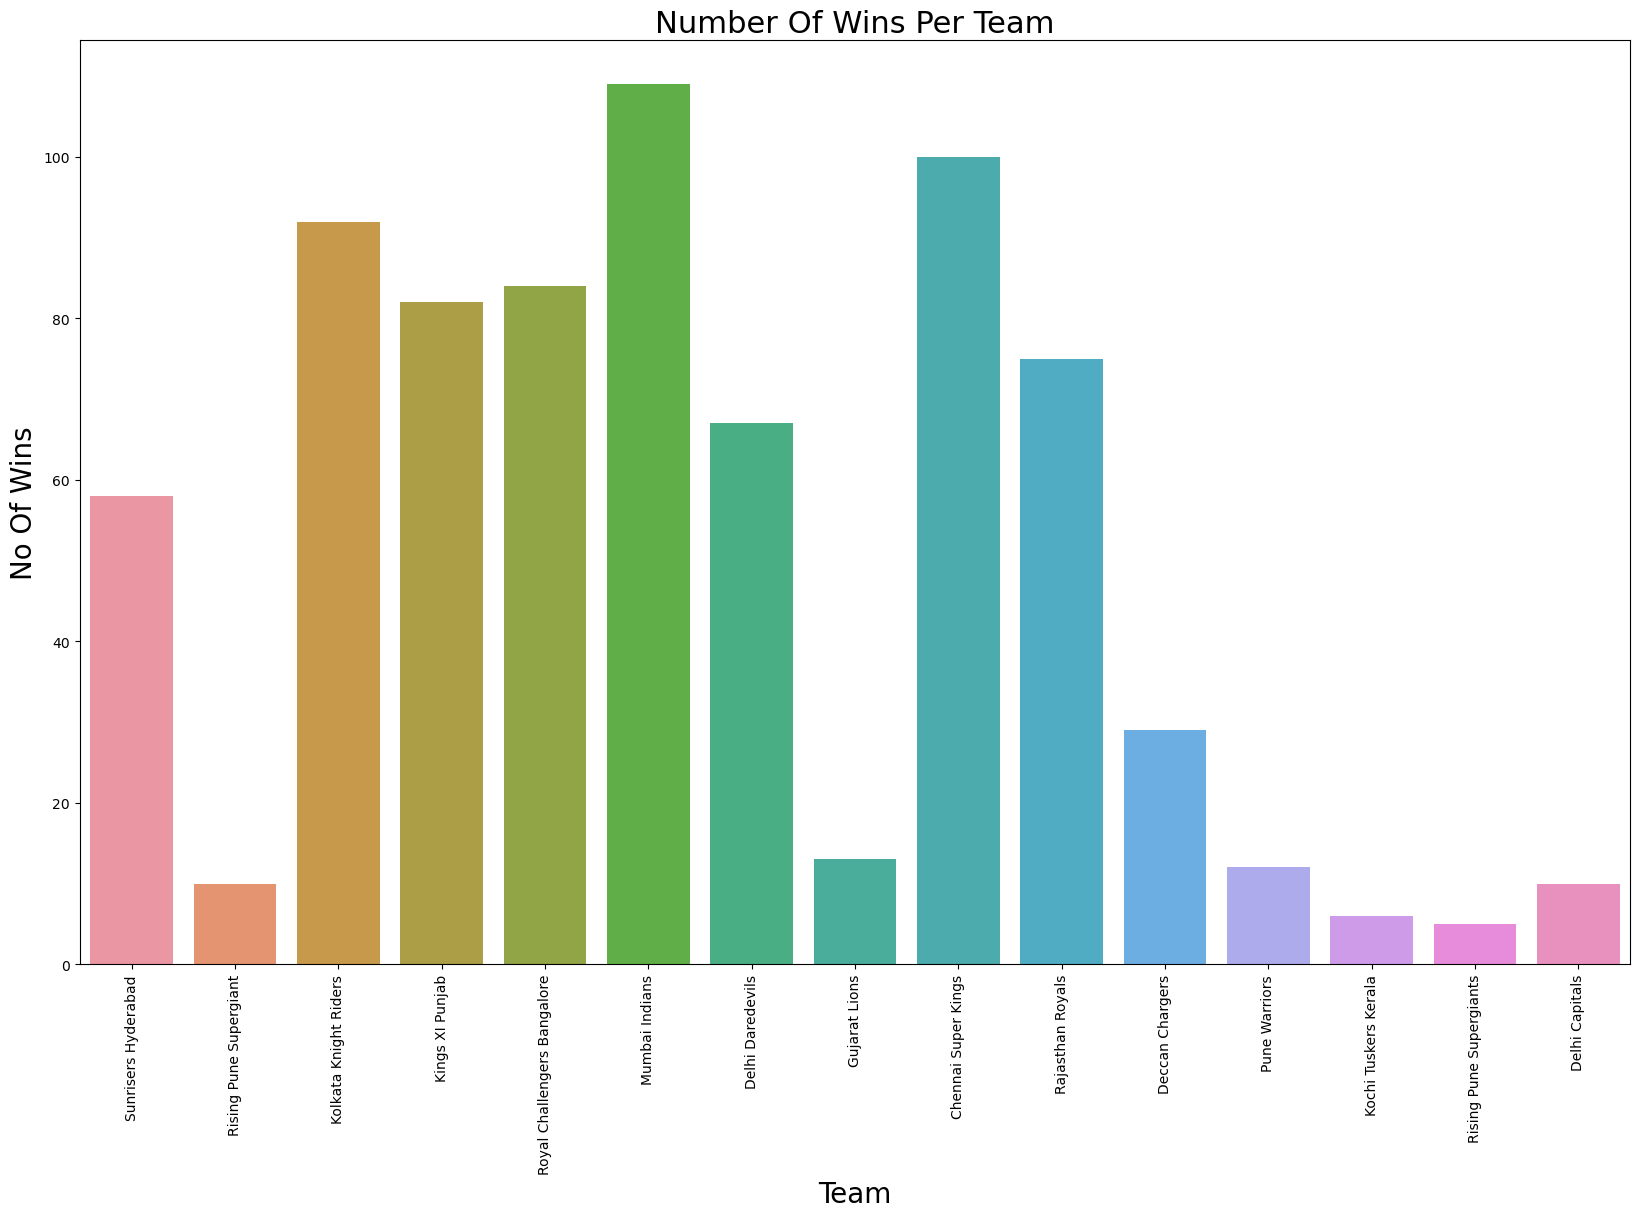

In [32]:
# No. Of Wins per Team 
plt.figure(figsize =(20,12))
sns.countplot(x='winner' , data=matches)
plt.title("Number Of Wins Per Team",fontsize = 22)
plt.xticks(rotation = 90)
plt.xlabel("Team" , fontsize = 20)
plt.ylabel("No Of Wins" , fontsize = 20)
plt.show()

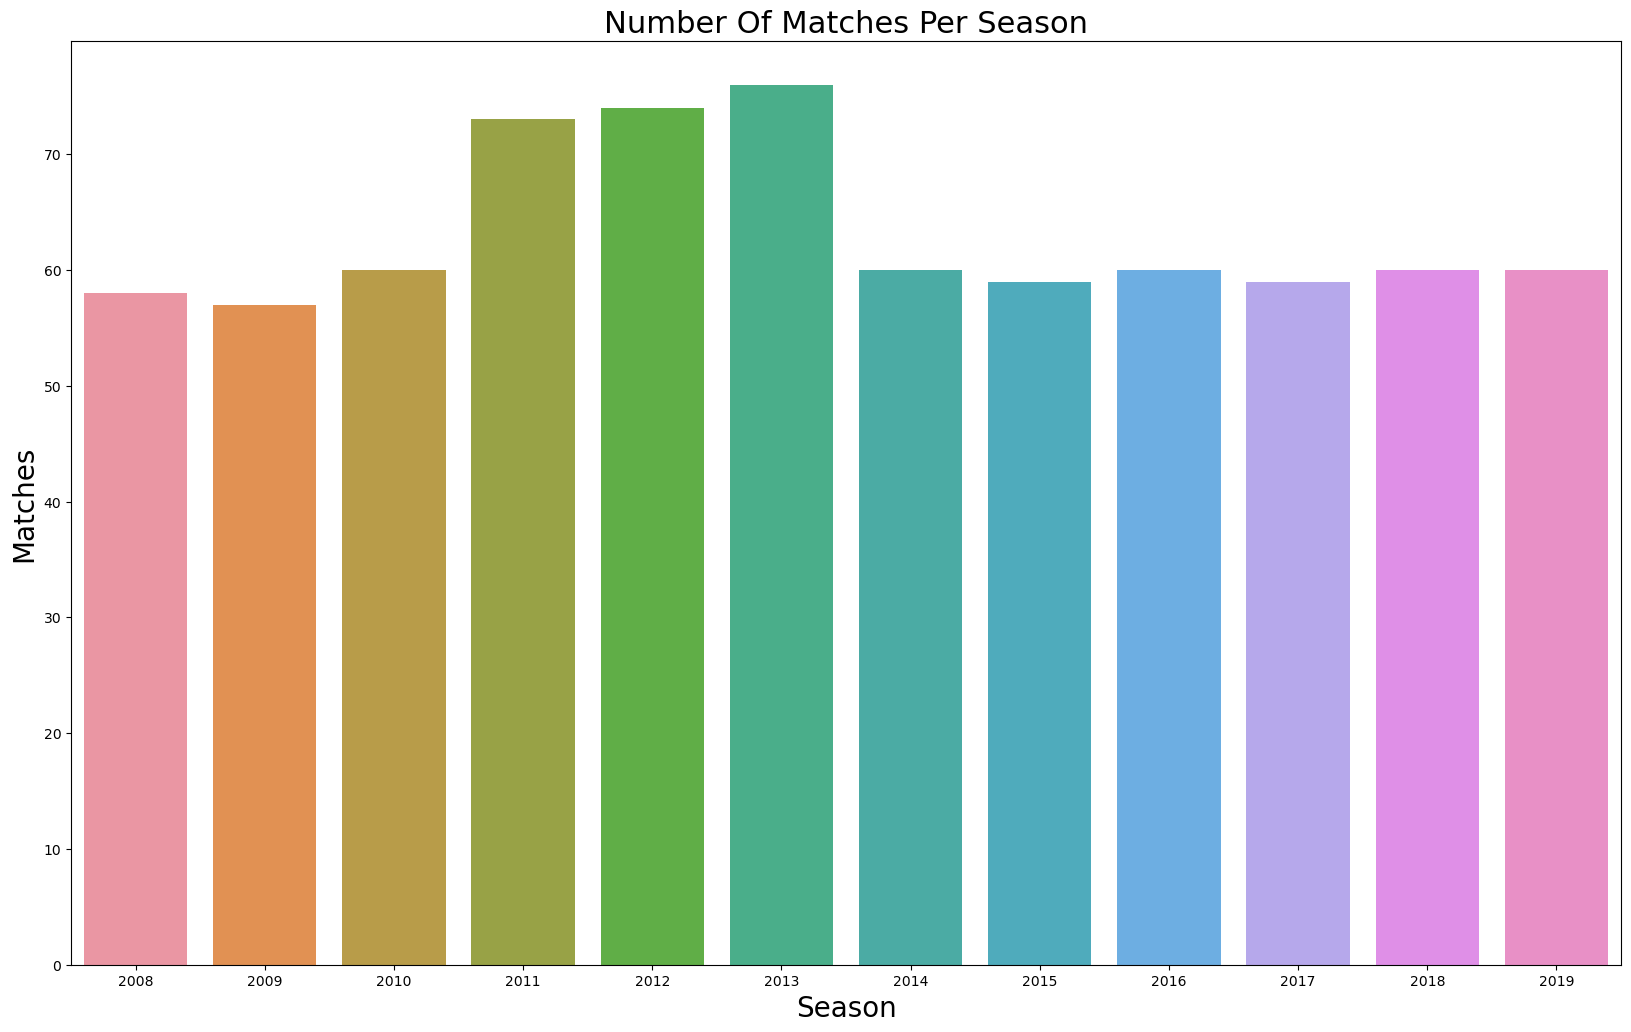

In [34]:
# Number Of Matches Per Season
plt.figure(figsize=(20,12))
sns.countplot(x='season' , data= matches)
plt.title("Number Of Matches Per Season",fontsize=22)
plt.xlabel("Season" , fontsize = 20)
plt.ylabel("Matches" , fontsize = 20)
plt.show()

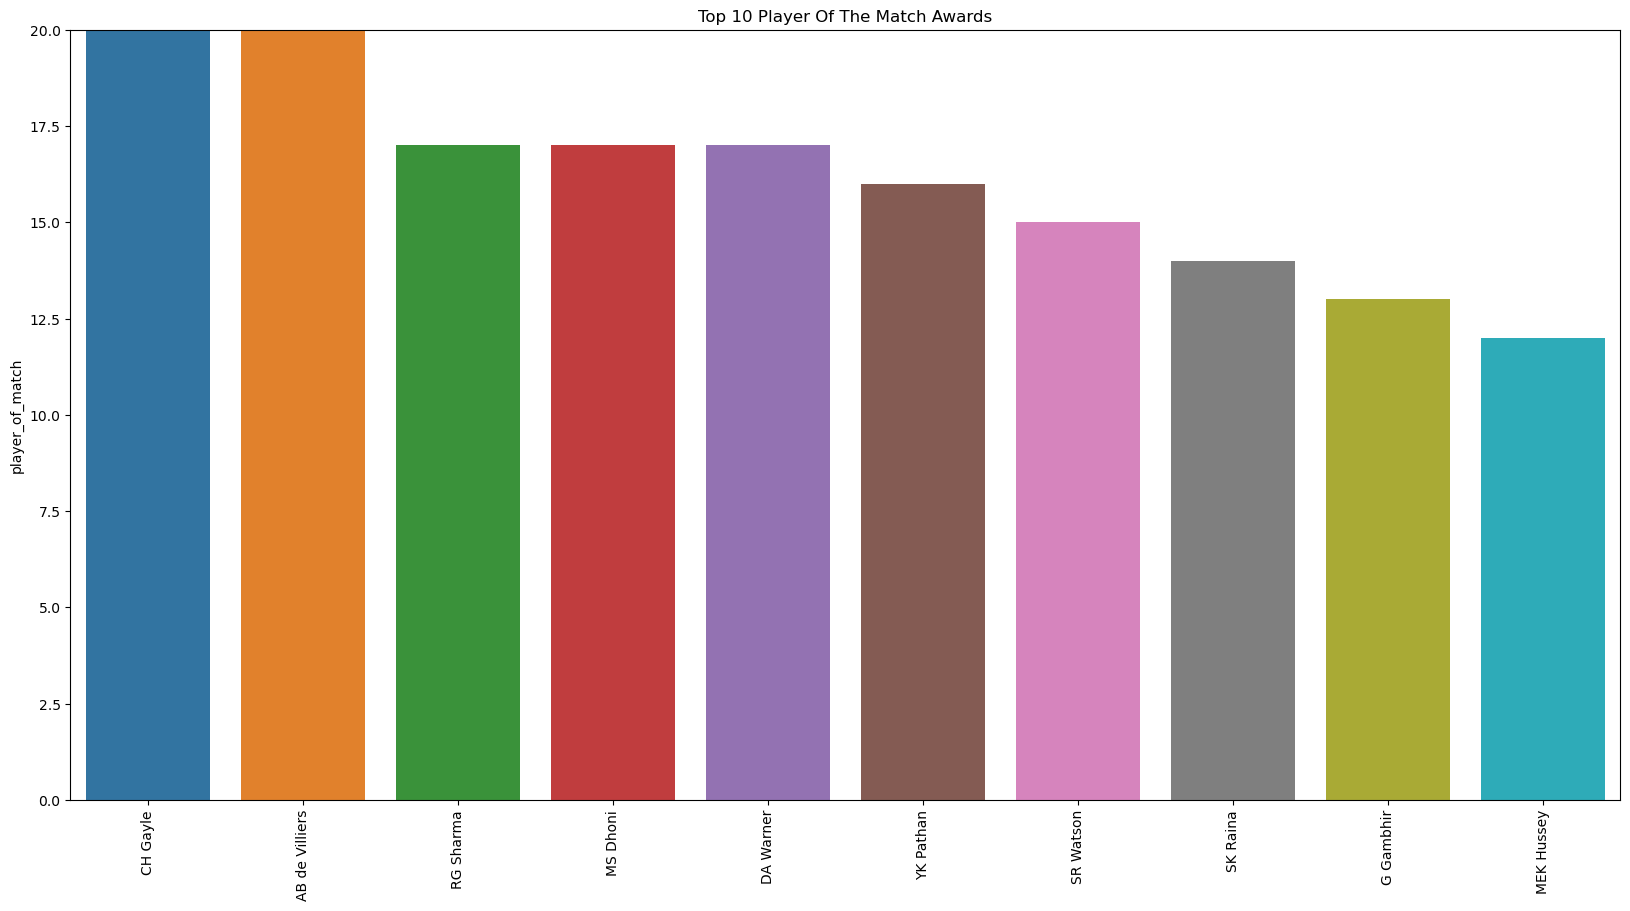

In [38]:
# Max Player Of The Match Award
POTM = matches.player_of_match.value_counts()[:10]
fig , ax = plt.subplots(figsize = (20,10))
ax.set_ylim([0,20])
ax.set_ylabel("Count")
ax.set_title("Top 10 Player Of The Match Awards")
POTM.plot.bar()
sns.barplot(x = POTM.index , y = POTM)
plt.show()

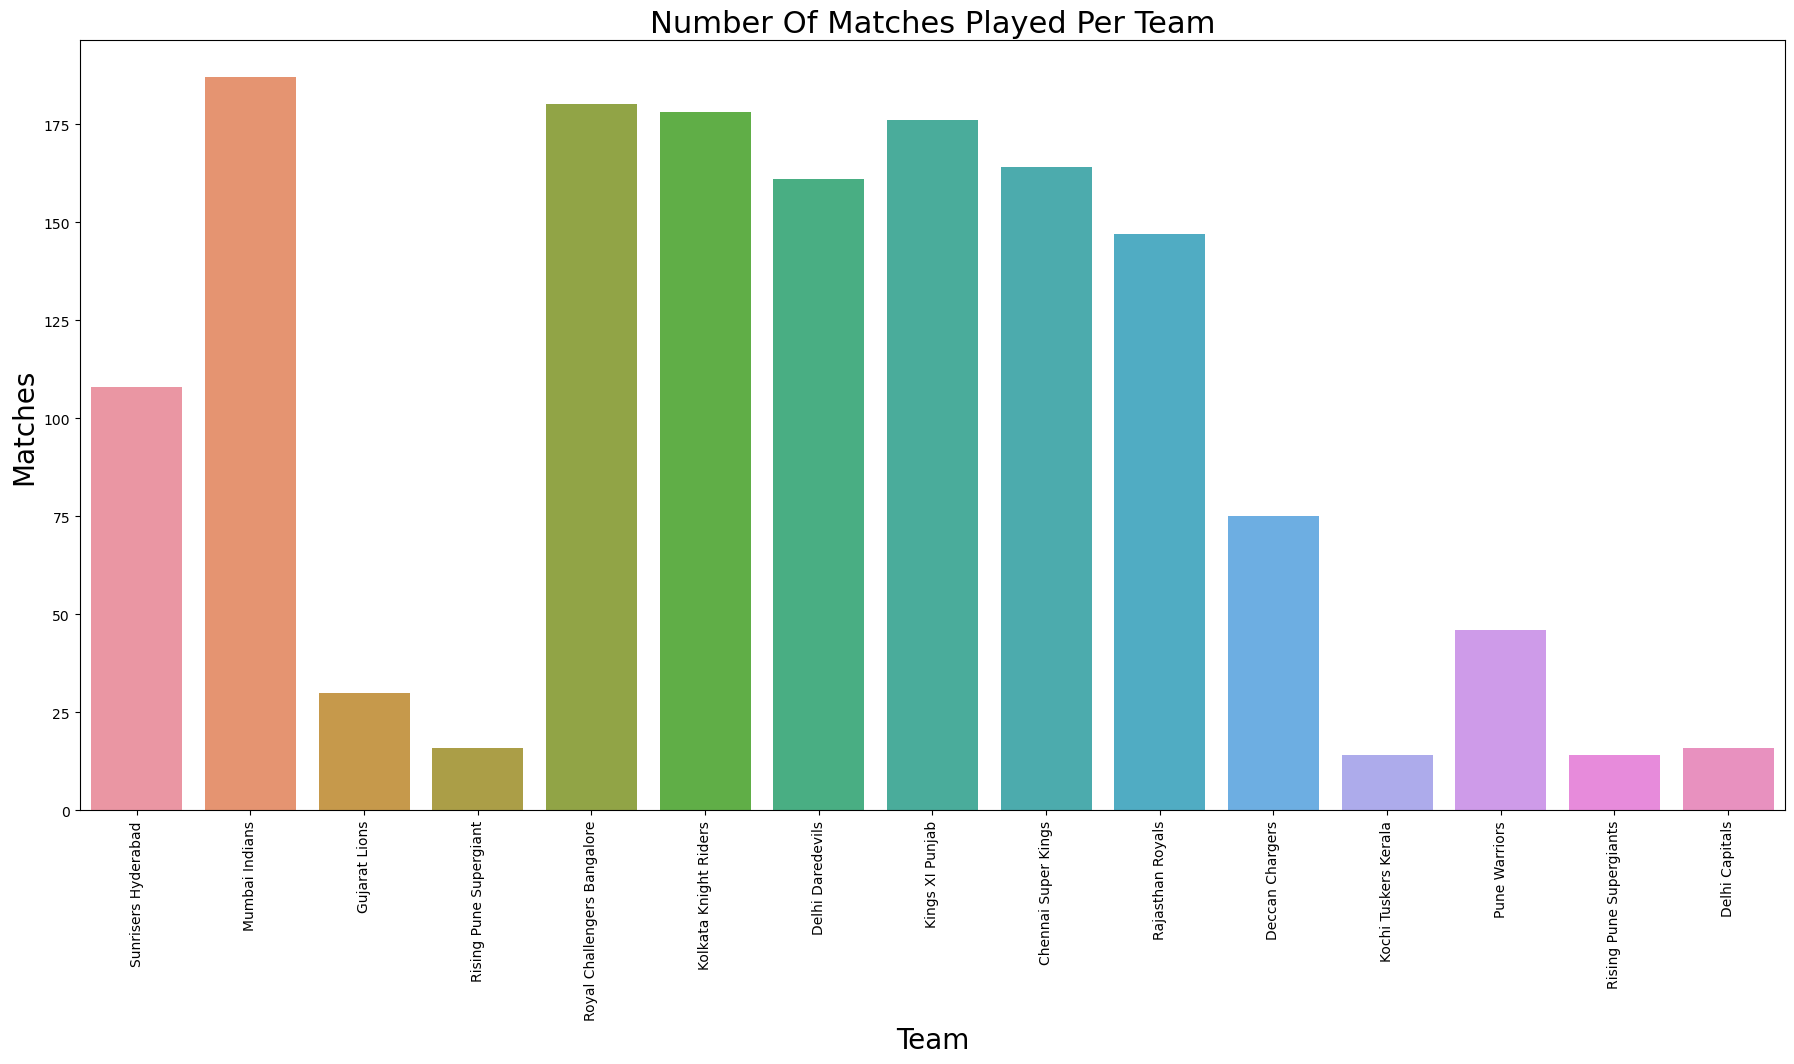

In [42]:
# Number Of Matches Played Per Team
temp = pd.melt(matches , id_vars=['id','season'] , value_vars=['team1','team2'])
plt.figure(figsize=(22,10))
sns.countplot(x = 'value' , data=temp)
plt.xticks(rotation = 90)
plt.title("Number Of Matches Played Per Team" , fontsize = 22)
plt.xlabel("Team" , fontsize = 20)
plt.ylabel("Matches" , fontsize = 20)
plt.show()

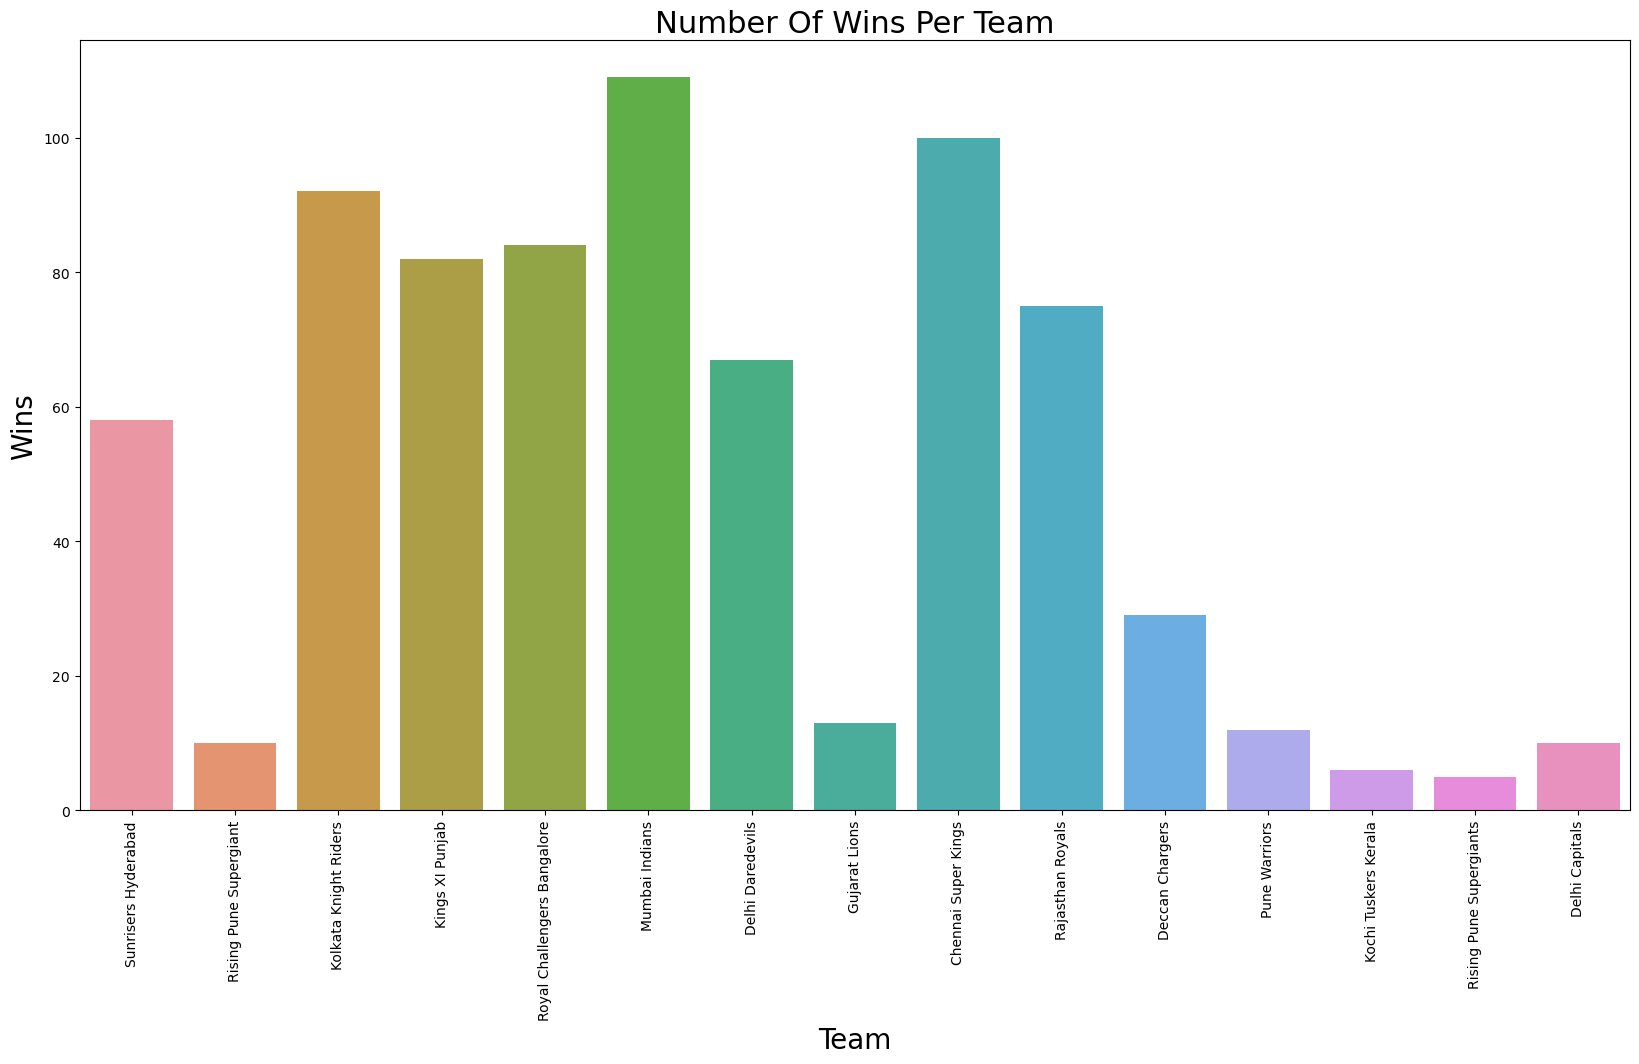

In [45]:
# Number Of Wins Per Team 

plt.figure(figsize = (20,10))
sns.countplot(x = 'winner' , data=matches)
plt.title("Number Of Wins Per Team" , fontsize = 22)
plt.xlabel("Team", fontsize = 20)
plt.ylabel("Wins" , fontsize = 20)
plt.xticks(rotation = 90)
plt.show()

In [46]:
# Champion Of Each Season 

champs = matches.drop_duplicates(subset=['season'] , keep= 'last')[['season' , 'winner']].reset_index(drop = True)
champs

,season,winner
0,2017,Mumbai Indians
1,2008,Rajasthan Royals
2,2009,Deccan Chargers
3,2010,Chennai Super Kings
4,2011,Chennai Super Kings
5,2012,Kolkata Knight Riders
6,2013,Mumbai Indians
7,2014,Kolkata Knight Riders
8,2015,Mumbai Indians
9,2016,Sunrisers Hyderabad


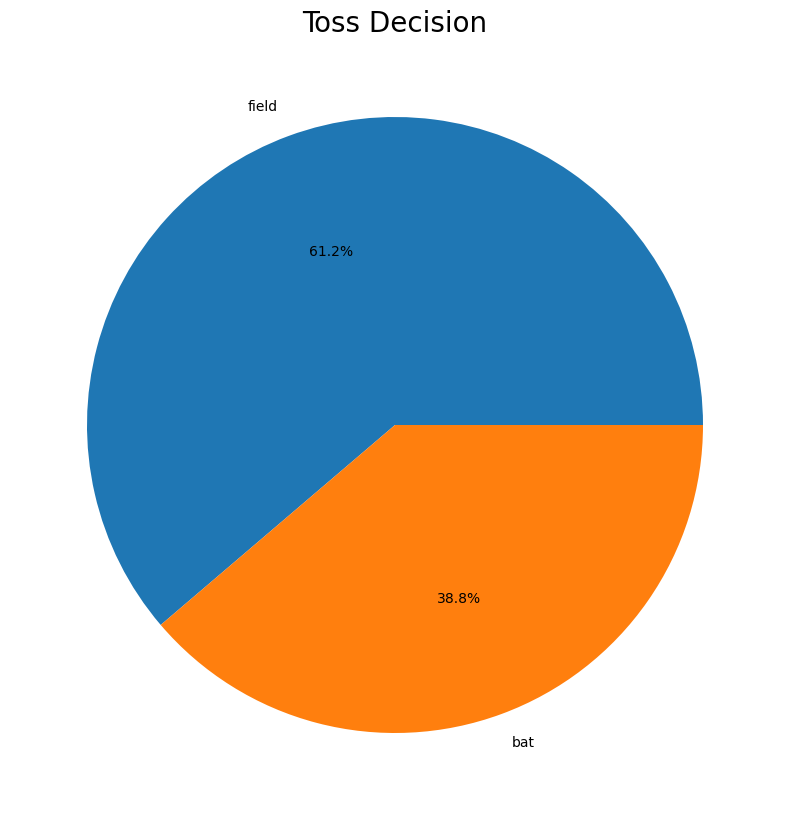

In [7]:
# Toss Decision

Toss = matches.toss_decision.value_counts()
labels = np.array(Toss.index)
sizes = Toss.values
plt.figure(figsize = (20,10))
plt.pie(sizes , labels=labels , autopct='%1.1f%%')
plt.title("Toss Decision" , fontsize = 20)
plt.show()

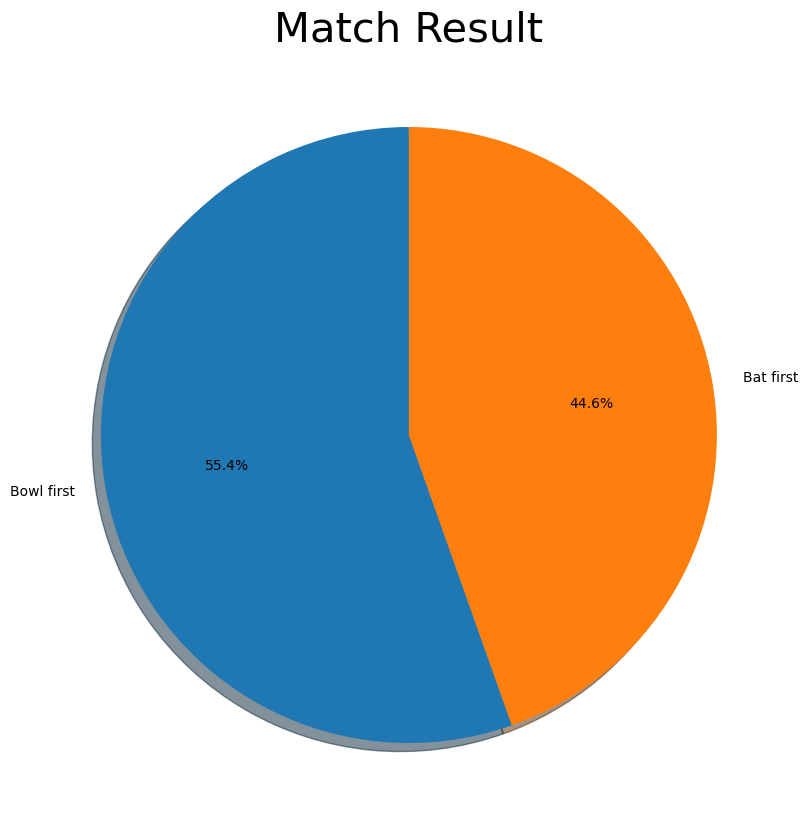

In [10]:
matches['win_by']=np.where(matches['win_by_runs']>0,'Bat first','Bowl first')
Win=matches.win_by.value_counts()
labels=np.array(Win.index)
sizes = Win.values
plt.figure(figsize = (20,10))
plt.pie(sizes, labels=labels,autopct='%1.1f%%', shadow=True,startangle=90)
plt.title('Match Result',fontsize=30)
plt.show()

C:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


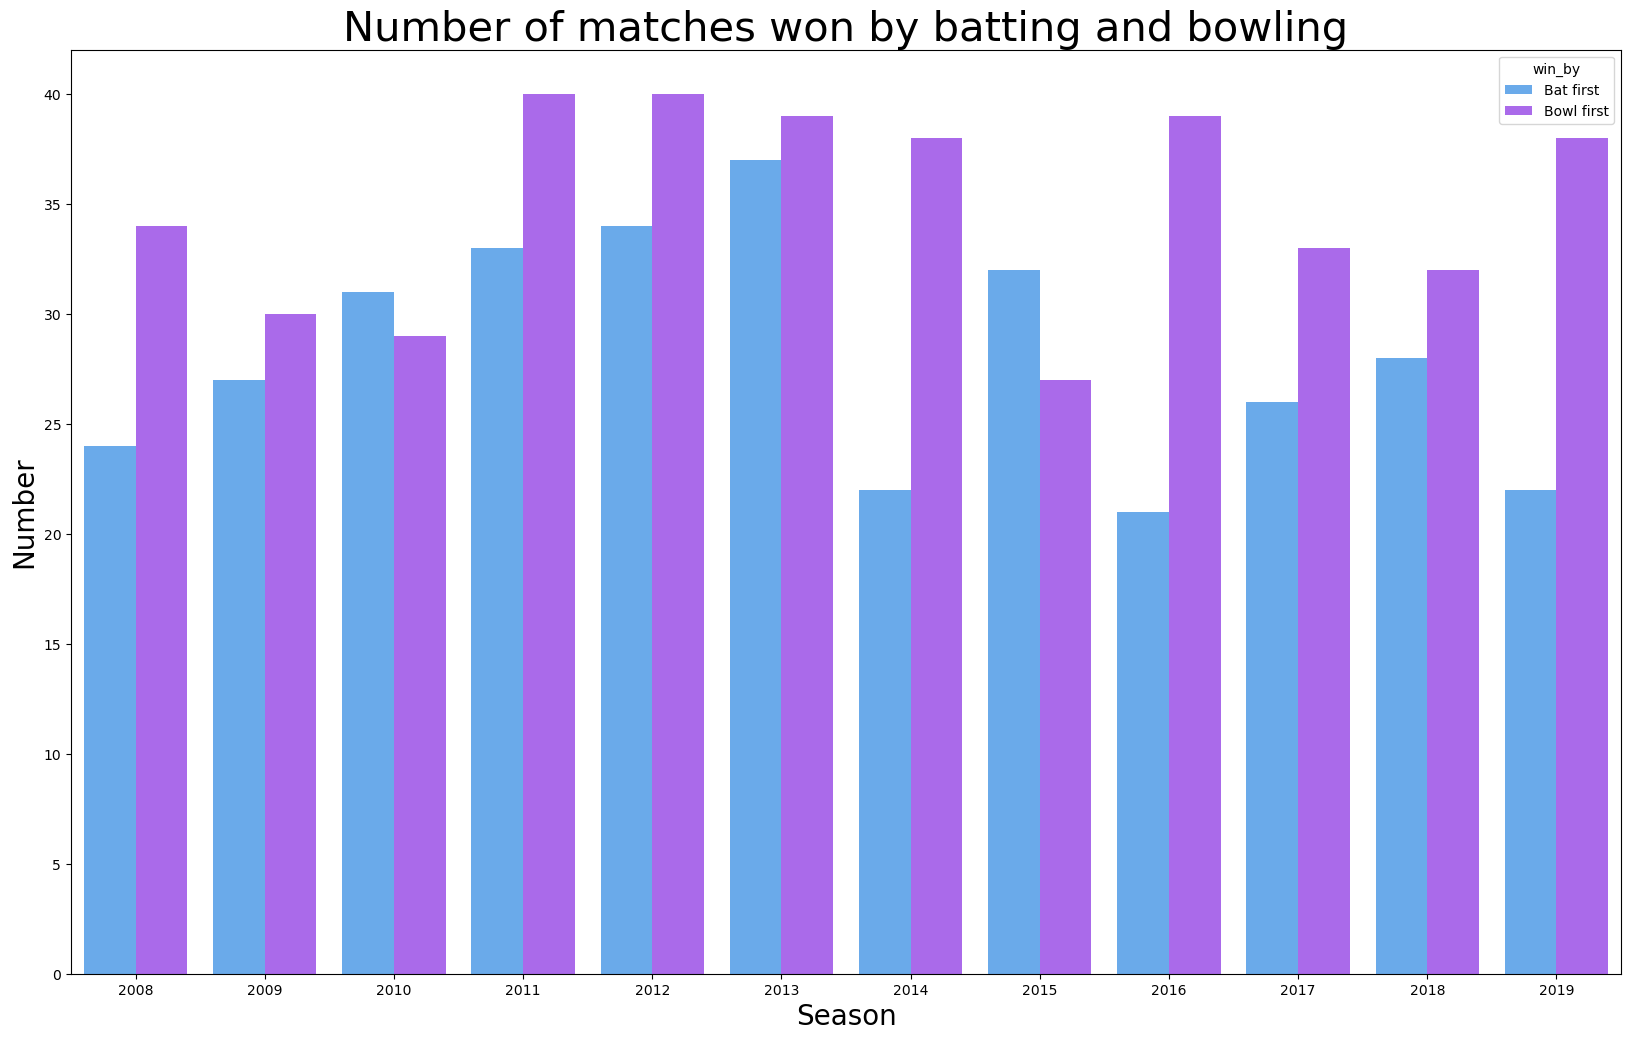

In [12]:
plt.figure(figsize = (20,12))
sns.countplot('season',hue='win_by',data=matches,palette='cool')
plt.title("Number of matches won by batting and bowling",fontsize=30)
plt.xlabel("Season",fontsize=20)
plt.ylabel("Number",fontsize=20)
plt.show()

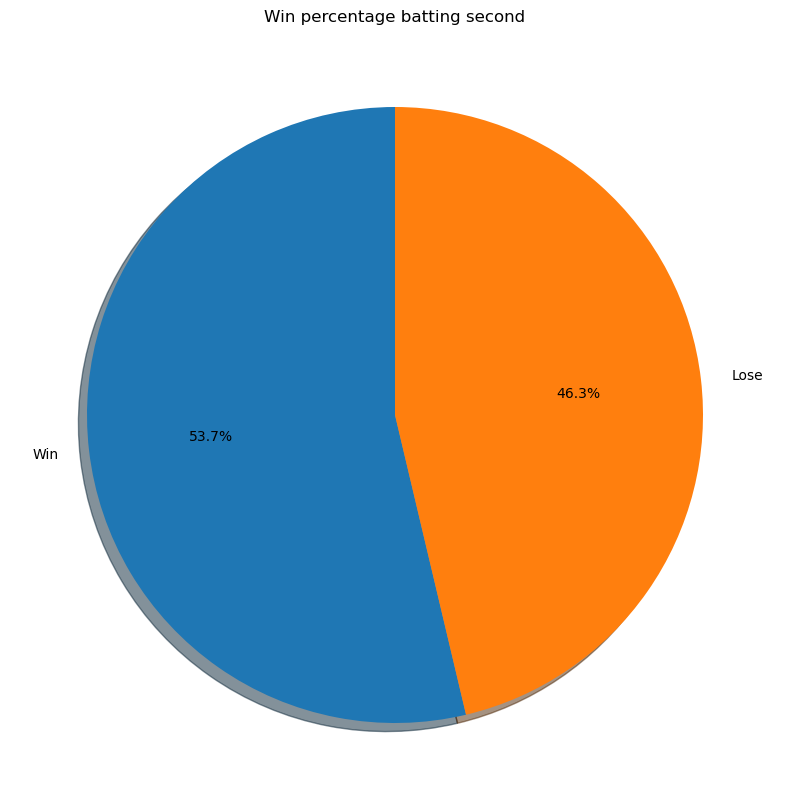

In [15]:
plt.figure(figsize = (20,10))
num_of_wins = (matches.win_by_wickets>0).sum()
num_of_loss = (matches.win_by_wickets==0).sum()
labels = ["Win", "Lose"]
total = float(num_of_wins + num_of_loss)
sizes = [(num_of_wins/total)*100, (num_of_loss/total)*100]
plt.pie(sizes, labels=labels,autopct='%1.1f%%', shadow=True, startangle=90)
plt.title("Win percentage batting second")
plt.show()

In [16]:
# Number Of Matches Plays by Bats

bats_matches= deliveries[["match_id","player_dismissed"]]
bats_matches=bats_matches .groupby("player_dismissed")["match_id"].count().reset_index().sort_values(by="match_id",ascending=False).reset_index(drop=True)
bats_matches.columns=["batsman","No_of Matches"]
bats_matches


,batsman,No_of Matches
0,SK Raina,162
1,RG Sharma,155
2,RV Uthappa,153
3,V Kohli,143
4,S Dhawan,137
...,...,...
482,C Madan,1
483,SMSM Senanayake,1
484,P Chopra,1
485,P Krishna,1


In [17]:
# Top Players Played
bats_matches.head(5)

,batsman,No_of Matches
0,SK Raina,162
1,RG Sharma,155
2,RV Uthappa,153
3,V Kohli,143
4,S Dhawan,137


In [18]:
# Least Players Played
bats_matches.tail(5)

,batsman,No_of Matches
482,C Madan,1
483,SMSM Senanayake,1
484,P Chopra,1
485,P Krishna,1
486,M Santner,1


In [20]:
# Top Scorers IPL 

Score_of_bats=deliveries.groupby('batsman')['batsman_runs'].agg(['sum']).reset_index().sort_values('sum',ascending=False).reset_index(drop=True)
Score_of_bats=Score_of_bats.rename(columns={'sum':'batsman_runs'})
Score_of_bats.iloc[:20,:]

,batsman,batsman_runs
0,V Kohli,5434
1,SK Raina,5415
2,RG Sharma,4914
3,DA Warner,4741
4,S Dhawan,4632
5,CH Gayle,4560
6,MS Dhoni,4477
7,RV Uthappa,4446
8,AB de Villiers,4428
9,G Gambhir,4223


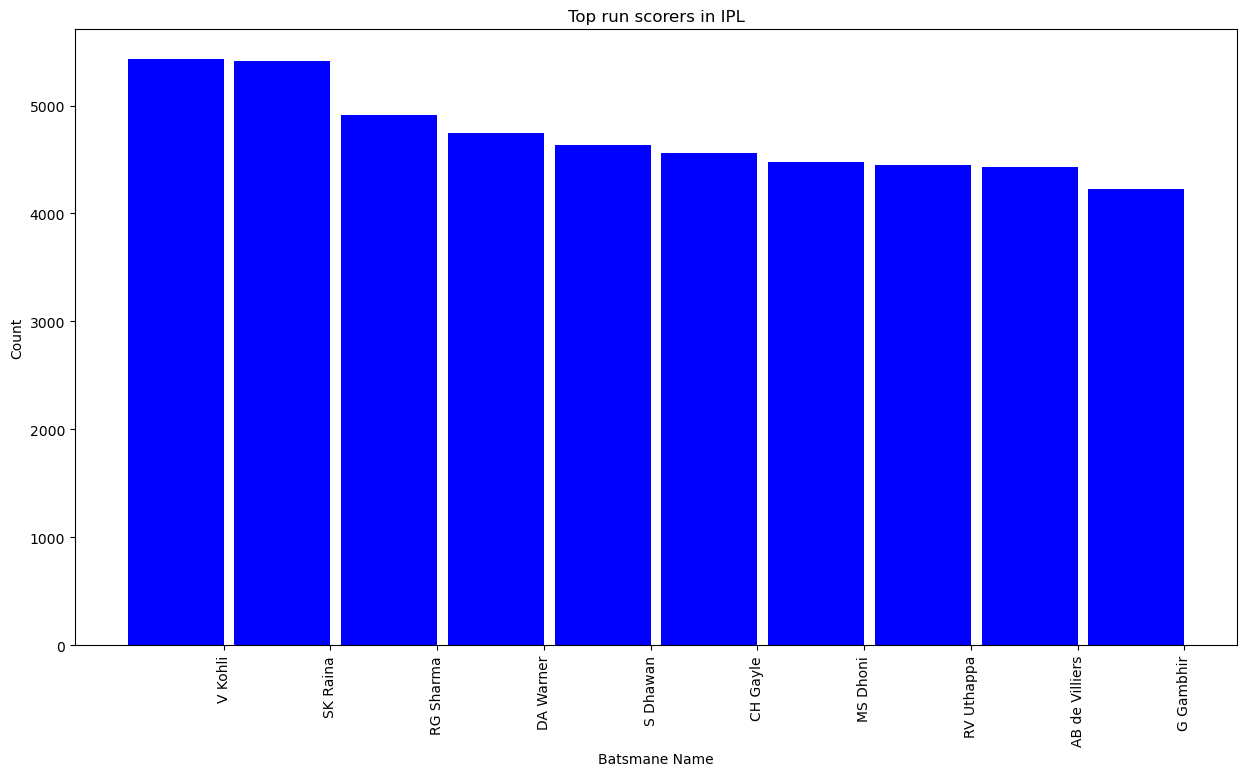

In [26]:
temp = deliveries.groupby('batsman')['batsman_runs'].agg('sum').reset_index().sort_values(by='batsman_runs', ascending=False).reset_index(drop=True)
temp = temp.iloc[:10,:]

labels = np.array(temp['batsman'])
ind = np.arange(len(labels))
width = 0.9
fig, ax = plt.subplots(figsize=(15,8))
rects = ax.bar(ind, np.array(temp['batsman_runs']), width=width, color='blue')
ax.set_xticks(ind+((width)/2.))
ax.set_xticklabels(labels, rotation='vertical')
ax.set_ylabel("Count")
ax.set_title("Top run scorers in IPL")
ax.set_xlabel('Batsmane Name')
plt.show()

C:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


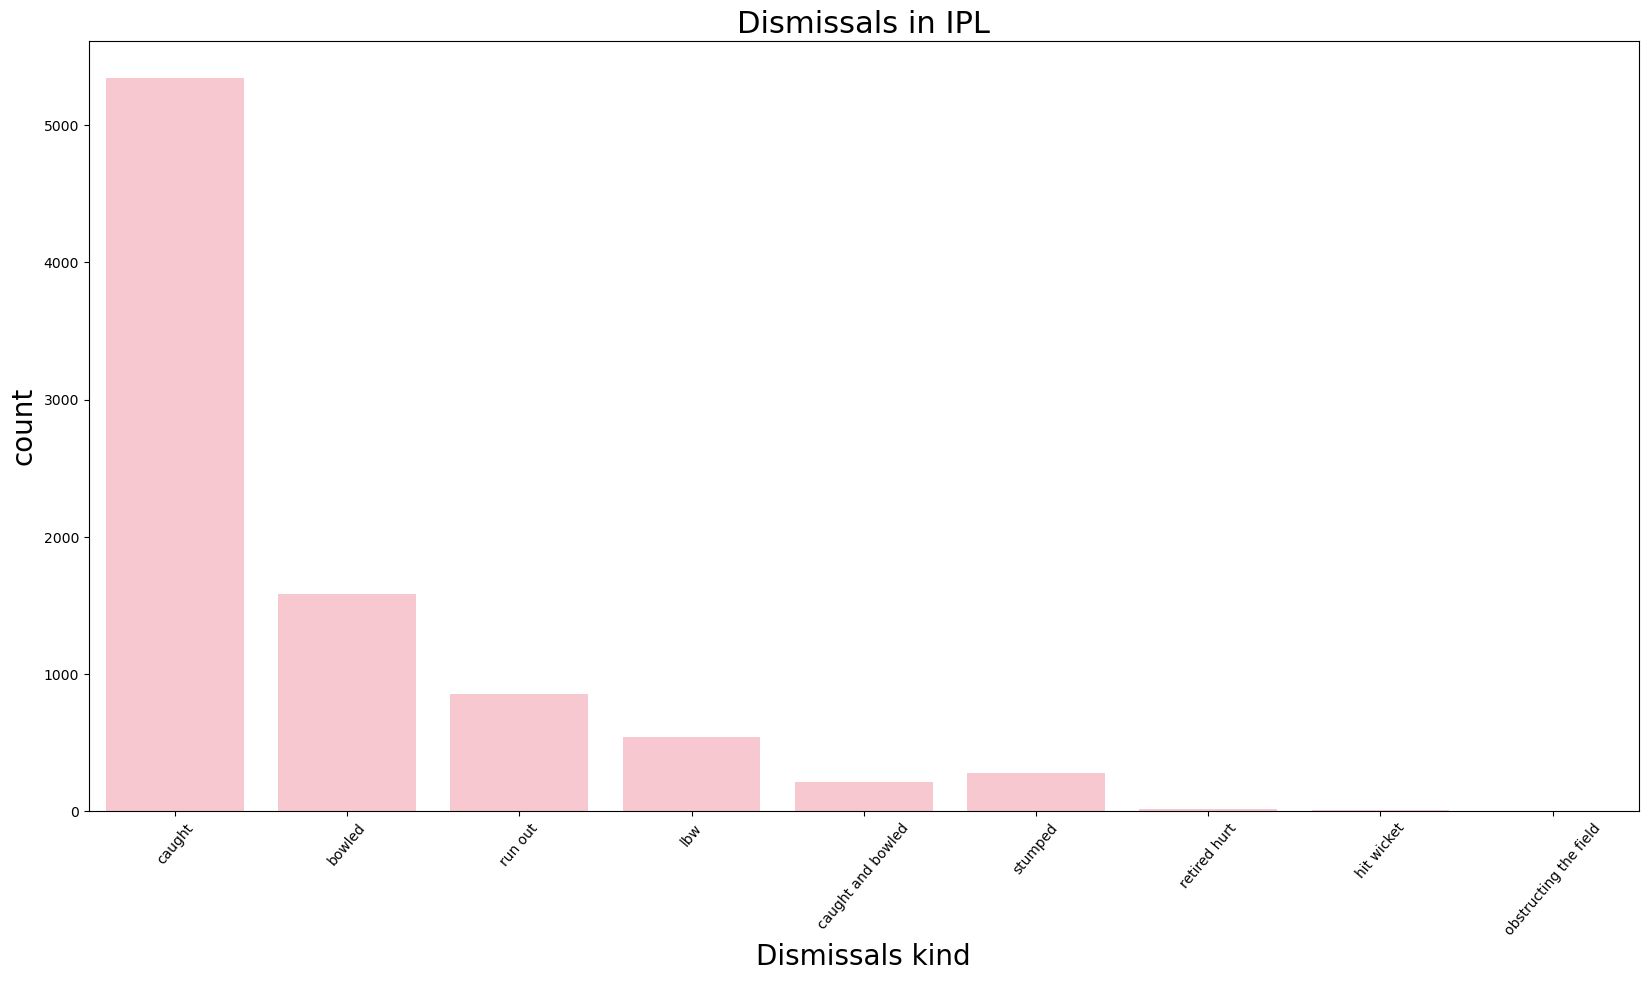

In [21]:
plt.figure(figsize=(20,10))
ax=sns.countplot(deliveries.dismissal_kind, color="pink")
plt.title("Dismissals in IPL",fontsize=22)
plt.xlabel("Dismissals kind",fontsize=20)
plt.ylabel("count",fontsize=20)
plt.xticks(rotation=50)
plt.show()

In [22]:
No_of_wicket=deliveries.dropna(subset=['dismissal_kind'])
No_of_wicket=No_of_wicket[~No_of_wicket['dismissal_kind'].isin(['run out','retired hurt','obstructing the field'])]
No_of_wicket.groupby('bowler')['dismissal_kind'].agg(['count']).reset_index().sort_values('count',ascending=False).reset_index(drop=True).iloc[:20,:]

,bowler,count
0,SL Malinga,170
1,A Mishra,156
2,Harbhajan Singh,150
3,PP Chawla,149
4,DJ Bravo,147
5,B Kumar,133
6,R Ashwin,125
7,SP Narine,122
8,UT Yadav,119
9,RA Jadeja,108


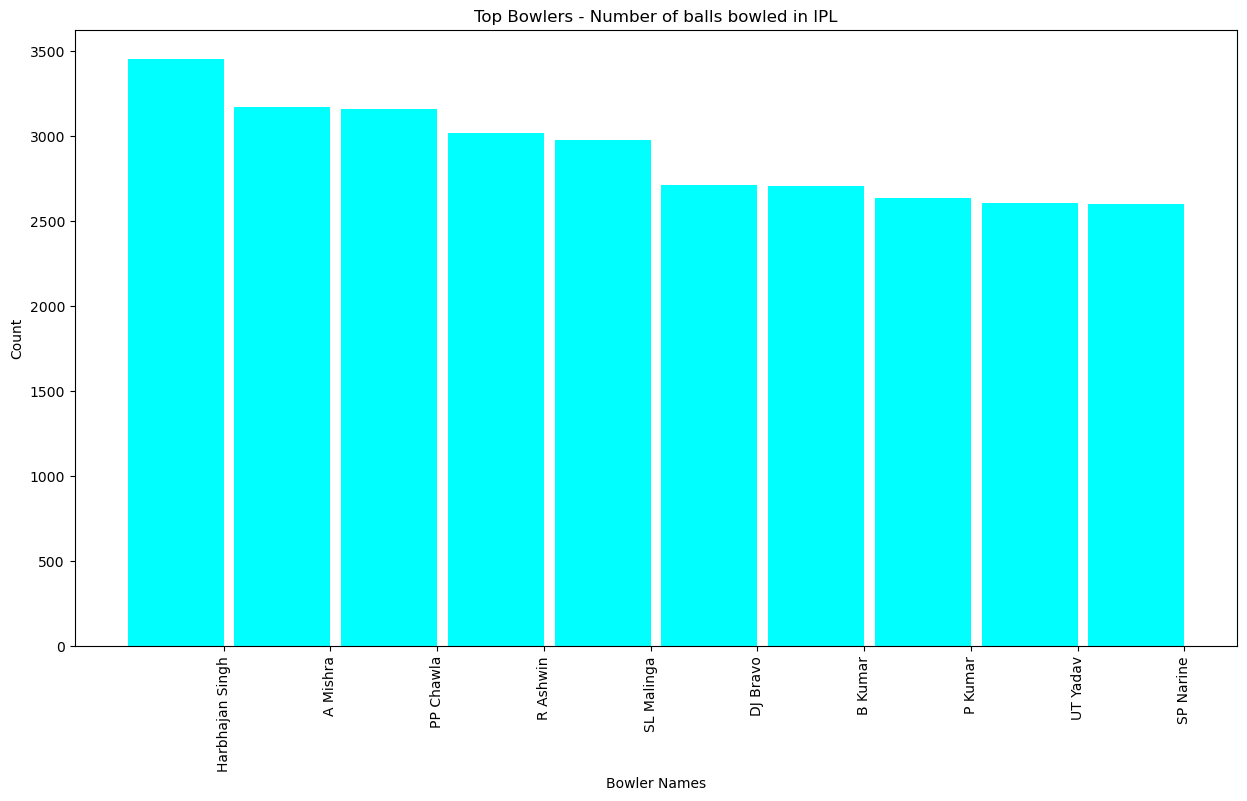

In [28]:
# TOP Bowlers

temp = deliveries.groupby('bowler')['ball'].agg('count').reset_index().sort_values(by='ball', ascending=False).reset_index(drop=True)
temp = temp.iloc[:10,:]

labels = np.array(temp['bowler'])
ind = np.arange(len(labels))
width = 0.9
fig, ax = plt.subplots(figsize=(15,8))
rects = ax.bar(ind, np.array(temp['ball']), width=width, color='cyan')
ax.set_xticks(ind+((width)/2.))
ax.set_xticklabels(labels, rotation='vertical')
ax.set_ylabel("Count")
ax.set_title("Top Bowlers - Number of balls bowled in IPL")
ax.set_xlabel('Bowler Names')
plt.show()

# Conclusion 
